# ERA5-Land hourly data analysis over Mumbai
- Import history and rename it to "ERA5-Land Mumbai': https://usegalaxy.eu/u/annefou/h/era5-land-mumbai

In [3]:
pip install cmcrameri

     |████████████████████████████████| 134 kB 4.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pprint import pprint

import bioblend.galaxy
import os
import glob

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [10]:
api_key = os.getenv('API_KEY', default=None)
server = 'https://usegalaxy.eu/'
gi = bioblend.galaxy.GalaxyInstance(url=server, key=api_key)

In [11]:
hist = gi.histories.get_histories(name='ERA5-Land Mumbai')

In [12]:
hist_id  = hist[0]['id']

In [13]:
history_datasets_info = gi.histories.show_history(history_id=hist_id, contents=True)

In [14]:
history_datasets_info

[{'extension': 'txt',
  'visible': True,
  'history_content_type': 'dataset',
  'purged': False,
  'url': '/api/histories/f8874274edf82b39/contents/4838ba20a6d86765c4e81ef11a3f9f19',
  'create_time': '2022-06-23T19:45:50.574043',
  'tags': ['contents:True)pprint(hdas)',
   'hdas:gi.histories.show_history(history_id=hist_id',
   'name:1950-2022',
   'name:monthly',
   'name:reanalysis-era5-land-monthly-means'],
  'name': 'Copernicus Climate Data Store',
  'id': '4838ba20a6d86765c4e81ef11a3f9f19',
  'type_id': 'dataset-4838ba20a6d86765c4e81ef11a3f9f19',
  'deleted': False,
  'update_time': '2022-07-05T08:46:41.891288',
  'hid': 1,
  'type': 'file',
  'state': 'ok',
  'dataset_id': '11ac94870d0bb33a3f39fdeefc049ba0',
  'history_id': 'f8874274edf82b39'},
 {'extension': 'netcdf',
  'visible': True,
  'history_content_type': 'dataset',
  'purged': False,
  'url': '/api/histories/f8874274edf82b39/contents/4838ba20a6d86765f747a67ddf0e94a2',
  'create_time': '2022-06-23T19:45:50.574057',
  'tag

In [15]:
def search(list, name):
    for i in range(len(list)):
        if list[i] == name:
            return True
    return False

In [16]:
dataset_name = 'Copernicus Climate Data Store'
dataset_extension = 'netcdf'
for ds in history_datasets_info:
    hourly_tag = search(ds['tags'], 'name:hourly')
    if ds['name'] == dataset_name and ds['extension'] == dataset_extension and hourly_tag:
        # download dataset
        print(ds['id'], ds['name'], ds['extension'], ds['tags'])
        dsname = "dataset"
        for tag in ds['tags']:
            dsname = dsname + tag.replace('name:', '_')
        dsname = dsname + '.' + ds['extension']
        print(dsname)
        datasets = gi.datasets.download_dataset(ds['id'],
                                            file_path='./data/'+ dsname,
                                            use_default_filename=False,
                                            maxwait=5)

4838ba20a6d86765f5fbcaf890224e91 Copernicus Climate Data Store netcdf ['name:1950-1959', 'name:hourly', 'name:reanalysis-era5-land']
dataset_1950-1959_hourly_reanalysis-era5-land.netcdf
4838ba20a6d86765633bb06a40c72162 Copernicus Climate Data Store netcdf ['name:1960-1969', 'name:hourly', 'name:reanalysis-era5-land']
dataset_1960-1969_hourly_reanalysis-era5-land.netcdf


In [17]:
lfiles = glob.glob('./data/*.netcdf')

In [18]:
dset = xr.open_mfdataset(lfiles)

In [19]:
dset

<xarray.Dataset>
Dimensions:    (longitude: 6, latitude: 6, time: 175319)
Coordinates:
  * longitude  (longitude) float32 72.5 72.6 72.7 72.8 72.9 73.0
  * latitude   (latitude) float32 19.25 19.15 19.05 18.95 18.85 18.75
  * time       (time) datetime64[ns] 1950-01-01T01:00:00 ... 1969-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(87647, 6, 6), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-27 02:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

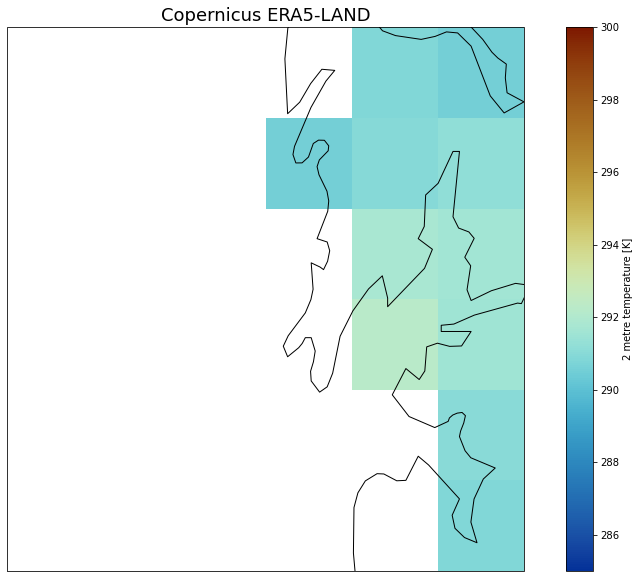

In [27]:
fig = plt.figure(1, figsize=[15,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator())
ax.coastlines(resolution='10m')

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
dset.isel(time=0)['t2m'].plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 285, vmax = 300, cmap=cmc.roma_r)
# One way to customize your title
plt.title("Copernicus ERA5-LAND", fontsize=18)
plt.savefig("ERA5_LAND.png")

In [ ]:
dset.